<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Milestone4_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso,  RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import time

from warnings import simplefilter
simplefilter('ignore', category=UserWarning) # ignore 'fit without feature names' warning
simplefilter('ignore', category=FutureWarning) # ignore XGBoost warning about is_categorical_dtype

<h1>Data Importing<h1>
<ul>
<li>full_df contains everything, including the one-hot-encoded/labeled variables and the response all together
<li>pred contains only the predictors
<li>resp contains the response variable Operational Energy
<ul>
<p>The steps below are to roughly prepare the data for usage, getting rid of the index columns and verifying the data is correct<p>

In [2]:
full_df = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Full_data.csv")
pred = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Predictors_data.csv")
resp = pd.read_csv("https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/Milestone4_data/Response_data.csv")

In [3]:
#Dropping index columns
full_df = full_df.drop('Unnamed: 0', axis=1)
pred = pred.drop('Unnamed: 0', axis=1)
resp = resp.drop('Unnamed: 0', axis=1)

In [4]:
full_df.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal,OE
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,1,0,0,0,0,0,0,1,141.615293
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,1,0,0,0,0,0,0,1,127.674846
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,1,0,0,0,255.768779
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,1,0,0,0,0,1,0,0,0,126.355396
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,0,0,0,0,0,0,1,0,0,124.733609


In [5]:
pred.head(5)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed,Metal
0,348,2.88,0.00,8.38,5.38,0.23,0.11,0.58,0.15,0.36,...,0,0,1,0,0,0,0,0,0,1
1,96,3.58,0.00,10.49,6.61,0.32,0.24,0.28,0.48,0.40,...,0,0,1,0,0,0,0,0,0,1
2,182,2.21,0.00,5.52,3.43,0.38,0.37,0.56,0.13,0.38,...,0,0,0,0,0,0,1,0,0,0
3,359,0.00,2.03,5.52,3.08,0.42,0.38,0.37,0.49,0.38,...,0,1,0,0,0,0,1,0,0,0
4,317,2.02,0.00,4.40,4.68,0.90,0.90,0.90,0.90,0.25,...,1,0,0,0,0,0,0,1,0,0


In [6]:
resp.head(5)

,OE
0,141.615293
1,127.674846
2,255.768779
3,126.355396
4,124.733609


<hr>
<hr>
<h1> Start your Models here! <h1>
<hr>
<hr>

In [7]:
# Separate predictors and response
X, y = pred, resp
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# I will do polynomial regression with Lasso

In [9]:
X_train.shape

(26000, 34)

In [10]:
X_train.columns

Index(['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio',
       'Packaged Single Zone - gas boiler', 'Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump', 'Courthouse',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed', 'Metal'],
      dtype='object')

In [11]:
#dopping one of each categorical predictors
X_train_used = X_train.drop(columns=["Packaged Single Zone - gas boiler" , "Courthouse", "Metal"])

In [12]:
X_test_used = X_test.drop(columns=["Packaged Single Zone - gas boiler" , "Courthouse", "Metal"])

In [13]:
X_train_used.shape, X_test_used.shape

((26000, 31), (6500, 31))

In [14]:
X_train_used.columns

Index(['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio',
       'Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed'],
      dtype='object')

In [15]:
X_train_used.head(1)

,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,SHGC,...,Large Hotel,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed
4825,293,3.6,0.0,5.81,5.56,0.85,0.85,0.85,0.85,0.38,...,0,0,0,1,0,0,0,0,1,0


In [16]:
#extracting quatitative variables
X_train_used_quant = X_train_used.drop(columns=['Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed'])

In [17]:
X_test_used_quant = X_test_used.drop(columns=['Packaged Single Zone - heat pump',
       'Variable Air Volume air-cooled chiller - gas boiler',
       'Variable Air Volume air-cooled chiller - heat pump',
       'Variable Air Volume chiller with central - gas boiler',
       'Variable Air Volume chiller with central - heat pump',
       'Full Service Restaurant', 'Hospital', 'Large Hotel', 'Medium Office',
       'Midrise Apartment', 'Retail', 'Secondary School', 'Supermarket',
       'Warehouse', 'Mass', 'Steel framed', 'Wood framed'])

In [18]:
X_train_used_quant.shape , X_test_used_quant.shape

((26000, 14), (6500, 14))

In [19]:
X_train_used_cat = X_train_used.drop(columns=['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio'])

In [20]:
X_test_used_cat = X_test_used.drop(columns=['Orientation', 'nonMassWallR [m^2-K/W]', 'MassWallR [m^2-K/W]',
       'RoofR [m^2-K/W]', 'ExteriorFloorR [m^2-K/W]', 'WWRnorth', 'WWRwest',
       'WWRsouth', 'WWReast', 'SHGC', 'WindowR [m^2-K/W]', 'numFloor',
       'AspectRatio', 'VolumeToFacadeRatio'])

In [21]:
X_train_used_cat.shape , X_test_used_cat.shape

((26000, 17), (6500, 17))

In [22]:
#Scaling quantitative preditcors

In [23]:
scaler = StandardScaler().fit(X_train_used_quant)
X_train_quant_sc = scaler.transform(X_train_used_quant)
X_test_quant_sc = scaler.transform(X_test_used_quant)

In [24]:
X_train_quant_sc.shape , X_test_quant_sc.shape

((26000, 14), (6500, 14))

In [25]:
# Finding the best hyper-parameter alpha

In [26]:
# I will test the alpha values by convention tested in class
alpha_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

In [27]:
# I will test for polynomial to the 30th degree to find the alpha,
# again based on convention of what we did in class
max_degree = 5

In [28]:
# Setting those up, the way we have done in class
include_bias = False
fit_intercept = True
max_iter = 100

In [29]:
poly = PolynomialFeatures(max_degree, include_bias=include_bias).fit(X_train_quant_sc)

In [30]:
X_train_quant_sc_poly = poly.transform(X_train_quant_sc)
X_train_quant_sc_poly.shape

(26000, 11627)

In [31]:
X_test_quant_sc_poly = poly.transform(X_test_quant_sc)
X_test_quant_sc_poly.shape

(6500, 11627)

In [32]:
X_train_used_cat.shape

(26000, 17)

In [33]:
X_train_quant_sc_poly = pd.DataFrame(X_train_quant_sc_poly)
X_train_used_cat = pd.DataFrame(X_train_used_cat, columns = X_test_used_cat.columns)

In [34]:
X_train_used_cat.head()

,Packaged Single Zone - heat pump,Variable Air Volume air-cooled chiller - gas boiler,Variable Air Volume air-cooled chiller - heat pump,Variable Air Volume chiller with central - gas boiler,Variable Air Volume chiller with central - heat pump,Full Service Restaurant,Hospital,Large Hotel,Medium Office,Midrise Apartment,Retail,Secondary School,Supermarket,Warehouse,Mass,Steel framed,Wood framed
4825,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
23440,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
11879,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
11758,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5937,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [35]:
X_train_quant_sc_poly.shape

(26000, 11627)

In [36]:
X_train_quant_sc_poly.columns = X_train_quant_sc_poly.columns.astype(str)

In [37]:
X_train_used_cat.columns = X_train_used_cat.columns.astype(str)

In [38]:
X_train_used_cat.shape

(26000, 17)

In [39]:
X_train_used_cat_reset = X_train_used_cat.reset_index(drop=True)
X_train_quant_sc_poly_reset = X_train_quant_sc_poly.reset_index(drop=True)

In [40]:
X_train_quant_sc_poly_cat = pd.concat([X_train_used_cat_reset, X_train_quant_sc_poly_reset], axis=1)

In [41]:
X_train_quant_sc_poly_cat.shape

(26000, 11644)

<hr>
--Sang--
<hr>

In [42]:
max_degree = 2

In [43]:
poly = PolynomialFeatures(max_degree, include_bias=include_bias)

#Fit to the standardized quantitative training data and transform both train and test data
X_train_quant_sc_poly = poly.fit_transform(X_train_quant_sc)
X_test_quant_sc_poly = poly.transform(X_test_quant_sc)

#Convert the transformed training data back to DataFrame and reset index for concatenation
X_train_quant_sc_poly_df = pd.DataFrame(X_train_quant_sc_poly)
X_train_used_cat_reset = X_train_used_cat.reset_index(drop=True)

#Concatenate the categorical and polynomial features DataFrames
X_train_poly_cat = pd.concat([X_train_used_cat_reset, X_train_quant_sc_poly_df], axis=1)

#Get the shapes of the transformed data to confirm the process
X_train_poly_cat_shape = X_train_poly_cat.shape
X_test_quant_sc_poly_shape = X_test_quant_sc_poly.shape

X_train_poly_cat_shape, X_test_quant_sc_poly_shape

((26000, 136), (6500, 119))

In [45]:
fit_intercept = True
max_iter = 100

#Initialize LassoCV with the list of alphas, fit_intercept, and max_iter
#LassoCV will perform cross-validation to find the best alpha value
lasso_cv = LassoCV(alphas=alpha_list, fit_intercept=fit_intercept, max_iter=max_iter, cv=5, random_state=42)

#Fit the LassoCV model to the training data
X_train_poly_cat.columns = X_train_poly_cat.columns.astype(str)

#Now fit the LassoCV model to the training data
lasso_cv.fit(X_train_poly_cat, y_train.values.ravel())

#The best alpha value after cross-validation
best_alpha = lasso_cv.alpha_

#Coefficients of the Lasso model
lasso_coefficients = lasso_cv.coef_

#Performance metrics: mean squared error for each alpha
mse_path = lasso_cv.mse_path_

#Average mean squared error for each alpha
avg_mse = mse_path.mean(axis=1)

#R-squared score on the training data
r_squared_train = lasso_cv.score(X_train_poly_cat, y_train)

best_alpha, avg_mse, r_squared_train

(0.01,
 array([297.76955553, 287.14796908, 287.17201641, 287.18894266,
        287.19263782]),
 0.9939784713678153)

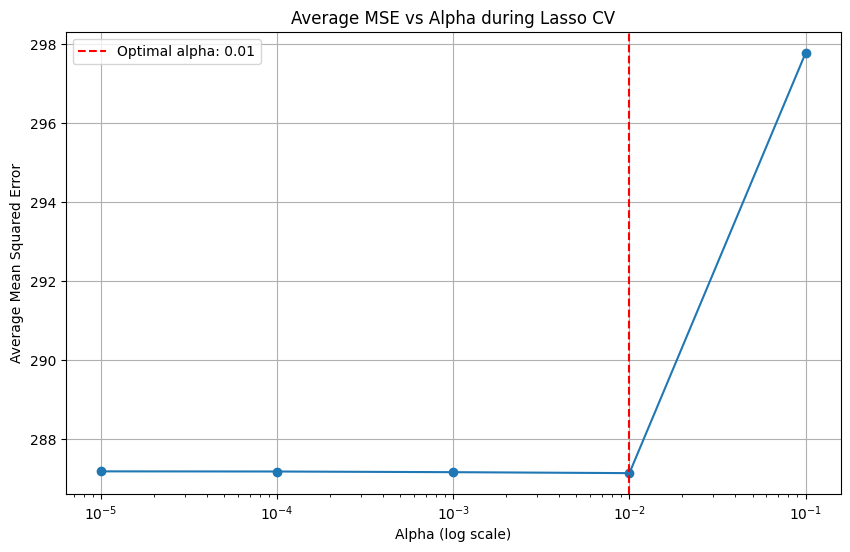

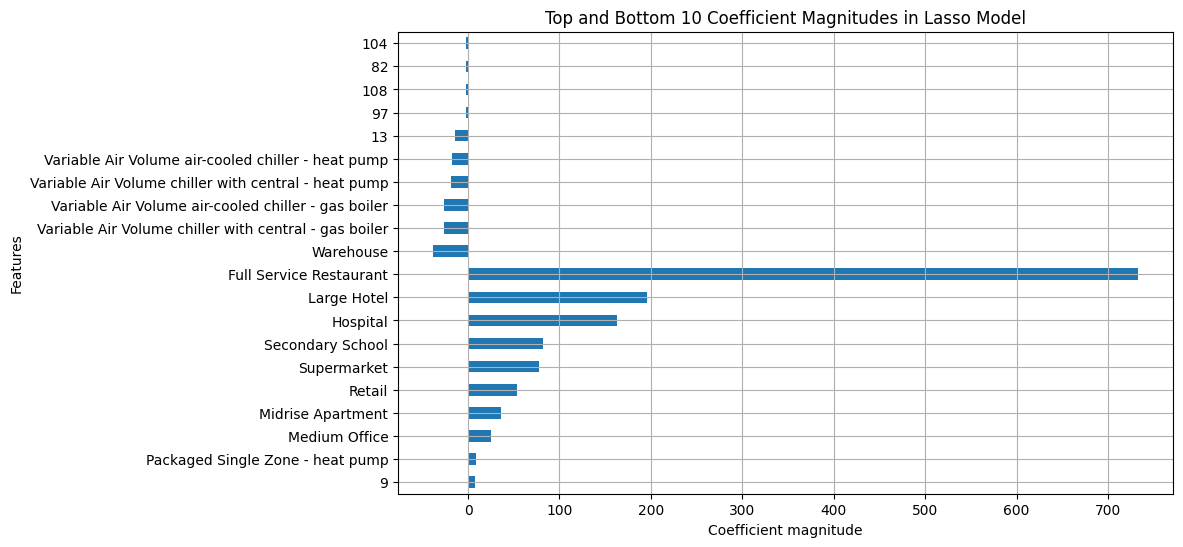

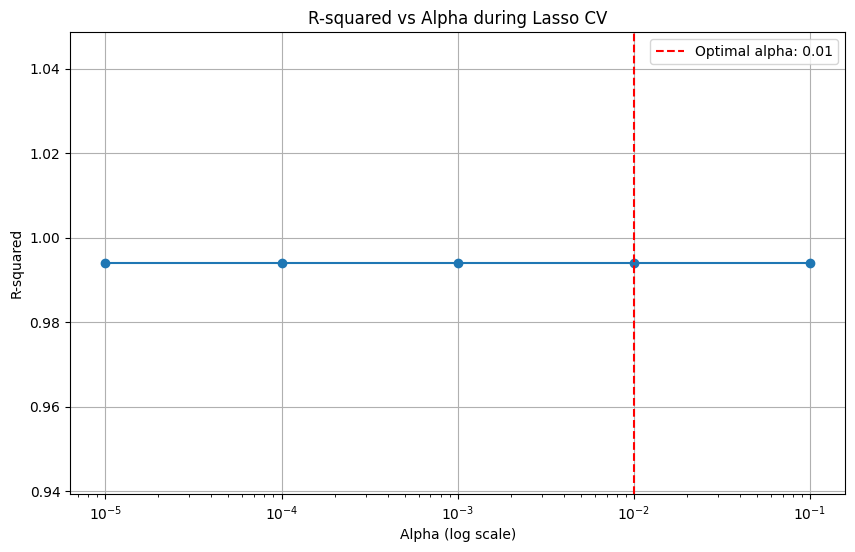

In [46]:
plt.figure(figsize=(10, 6))
plt.semilogx(lasso_cv.alphas_, avg_mse, '-o')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Average Mean Squared Error')
plt.title('Average MSE vs Alpha during Lasso CV')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', label=f'Optimal alpha: {best_alpha}')
plt.legend()
plt.grid(True)
plt.show()

#Plot the coefficient magnitudes
plt.figure(figsize=(10, 6))
coefs = pd.Series(lasso_coefficients, index=X_train_poly_cat.columns)
sorted_coefs = coefs.sort_values()
top_coefs = sorted_coefs[-10:].append(sorted_coefs[:10])  #show top and bottom 10
top_coefs.plot(kind='barh')
plt.title('Top and Bottom 10 Coefficient Magnitudes in Lasso Model')
plt.xlabel('Coefficient magnitude')
plt.ylabel('Features')
plt.grid(True)
plt.show()

#R-squared score on the training data
plt.figure(figsize=(10, 6))
r_squared_values = [lasso_cv.score(X_train_poly_cat, y_train) for alpha in lasso_cv.alphas_]
plt.semilogx(lasso_cv.alphas_, r_squared_values, '-o')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R-squared')
plt.title('R-squared vs Alpha during Lasso CV')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', label=f'Optimal alpha: {best_alpha}')
plt.legend()
plt.grid(True)
plt.show()

**Average MSE vs Alpha during Lasso CV:**

The first plot shows the relationship between different alpha values and the average Mean Squared Error (MSE) across cross-validation folds.
The red dashed line indicates the optimal alpha value (0.01), which is the regularization strength that resulted in the lowest average MSE.
We see that as alpha increases beyond this optimal value, the average MSE increases sharply, indicating that too much regularization is detrimental to the model's performance.

**Top and Bottom 10 Coefficient Magnitudes in Lasso Model:**

The second plot shows the magnitudes of the top and bottom 10 coefficients in the Lasso model.
The features on the left have negative coefficients, and those on the right have positive coefficients.
Large positive values indicate a strong positive impact on the response variable, while large negative values indicate a strong negative impact.
This visualization helps in understanding which features are most influential in the Lasso model. It's important to note that the sign of the coefficient indicates the direction of the relationship, while the magnitude indicates the strength.

**R-squared vs Alpha during Lasso CV:**

The third plot illustrates how the R-squared value of the model varies with different alpha values.
In this plot, we can see that the R-squared value remains fairly consistent across the range of alphas, suggesting that the model's explanatory power is robust to the regularization strength, up until the optimal alpha is reached.
Beyond the optimal alpha, the model's explanatory power isn't shown, but we could expect it to decrease as the model becomes overly regularized.

In [48]:
X_test_poly = poly.transform(X_test_quant_sc)  #Transform the test set with the same polynomial features
X_test_poly_cat = pd.concat([X_test_used_cat.reset_index(drop=True), pd.DataFrame(X_test_poly)], axis=1)
X_test_poly_cat.columns = X_test_poly_cat.columns.astype(str)  #Ensure column names are strings
y_pred = lasso_cv.predict(X_test_poly_cat)

#Calculate performance metrics on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

#Output the test MSE and R-squared values
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

#Coefficient analysis
coefs = pd.Series(lasso_cv.coef_, index=X_train_poly_cat.columns)


Test MSE: 302.5812751236815
Test R-squared: 0.9937545763948497


In [49]:
coefs

Packaged Single Zone - heat pump                          9.011407
Variable Air Volume air-cooled chiller - gas boiler     -26.111149
Variable Air Volume air-cooled chiller - heat pump      -18.021311
Variable Air Volume chiller with central - gas boiler   -26.394889
Variable Air Volume chiller with central - heat pump    -18.492417
                                                           ...    
114                                                       0.227077
115                                                       1.448140
116                                                       1.380307
117                                                      -1.497874
118                                                       4.629744
Length: 136, dtype: float64

<hr>
Examing the polynomial features and understand interactions
<hr>

In [57]:
original_feature_names = X_train_used_quant.columns

poly_feature_names = poly.get_feature_names_out(input_features=original_feature_names)

combined_feature_names = list(X_train_used_cat.columns) + list(poly_feature_names)

feature_coefficients = pd.Series(lasso_cv.coef_, index=combined_feature_names)

sorted_features = feature_coefficients.abs().sort_values(ascending=False)

print(sorted_features)

Full Service Restaurant                         732.561492
Large Hotel                                     196.112779
Hospital                                        162.613168
Secondary School                                 82.507570
Supermarket                                      77.660246
                                                   ...    
MassWallR [m^2-K/W] RoofR [m^2-K/W]               0.000000
WWReast WindowR [m^2-K/W]                         0.000000
nonMassWallR [m^2-K/W] SHGC                       0.000000
ExteriorFloorR [m^2-K/W]                          0.000000
ExteriorFloorR [m^2-K/W] VolumeToFacadeRatio      0.000000
Length: 136, dtype: float64


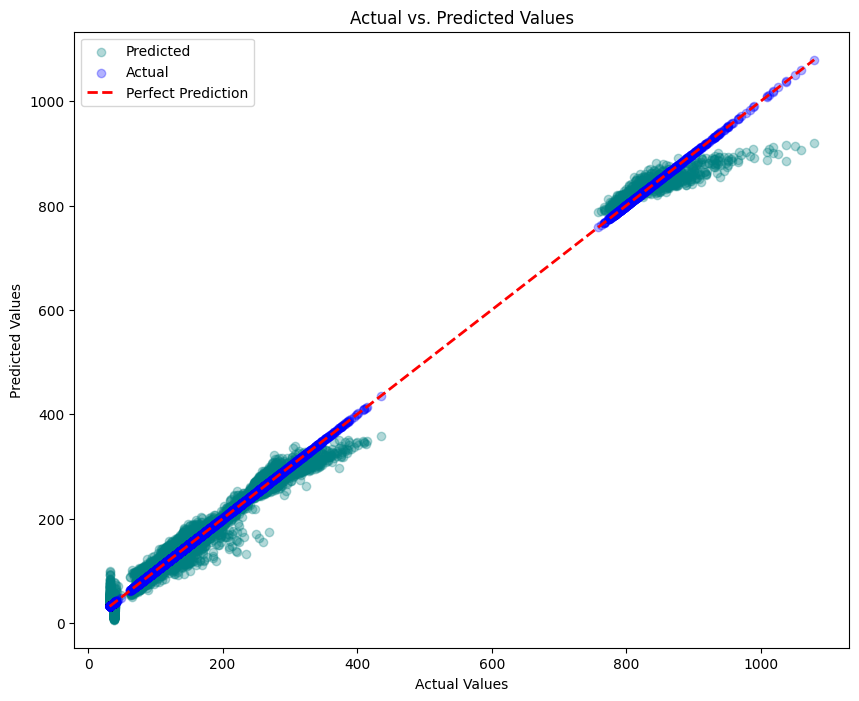

In [62]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.3, c='teal', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.3, c='blue', label='Actual')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()